In [1]:
import pandas as pd
import numpy as np

import utils

import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 500)

# Ravel Black/White

## GG97 OTU

In [2]:
task = 'Ravel Black/White GG97 OTU'
folder = 'ravel-black-whitev2'

In [3]:
num_features = 1095
weights = (1, -1)

In [4]:
df1 = pd.read_csv('./'+folder+'/ravel_black_white_gg_exp1/best_test.csv', sep=';') # NoRel+NoCLR
df2 = pd.read_csv('./'+folder+'/ravel_black_white_gg_exp2/best_test.csv', sep=';') # Rel+NoCLR
df3 = pd.read_csv('./'+folder+'/ravel_black_white_gg_exp3/best_test.csv', sep=';') # NoRel+CLR

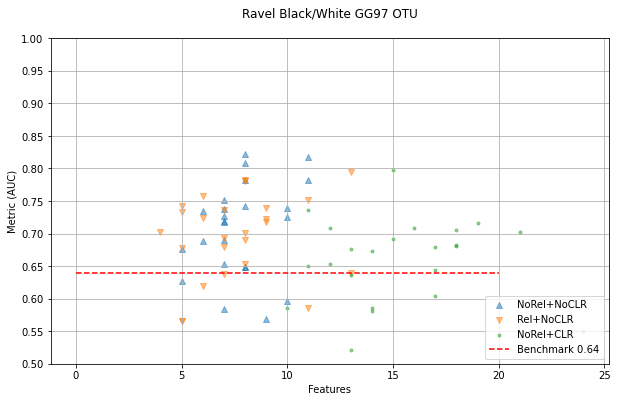

In [5]:
utils.plot(df1, df2, df3, 'num_genes', 'metric', num_features, weights, title=task, subtitle='', baseline=0.64, filename='./plotsv2/ravel_black_whites_gg97_otu.png', xmax=30, ylim=(0.5, 1.001))

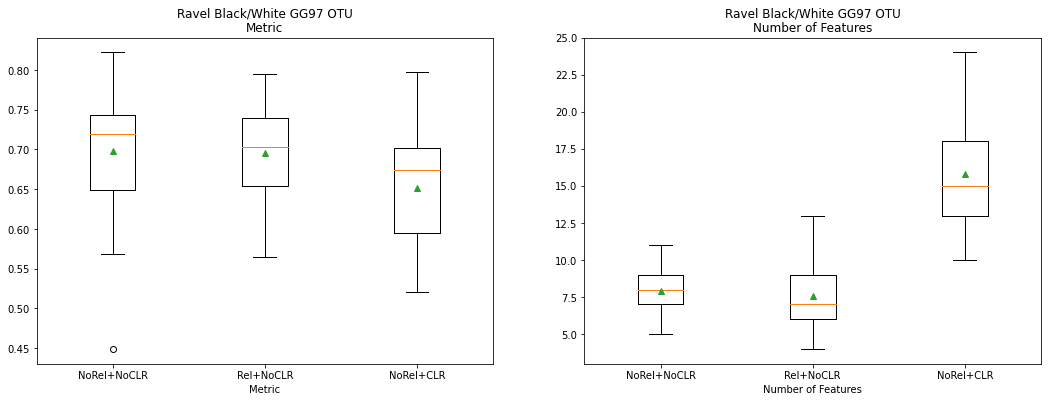

In [6]:
utils.boxplot(df1, df2, df3, num_features, weights, task, filename='./plotsv2/ravel_black_white_boxplot_refseq_otu.png')

In [7]:
d = {
    'NoRel+NoCLR': utils.all(df1, num_features, weights).sort_values('metric', ascending=False),
    'Rel+NoCLR': utils.all(df2, num_features, weights).sort_values('metric', ascending=False),
    'NoRel+CLR': utils.all(df3, num_features, weights).sort_values('metric', ascending=False)
}

---

In [8]:
import sys 
sys.path.append('../src')

import dataset
import config
import run_best_features
from tasks import *

import ast

In [9]:
n = 100

In [10]:
# Experiment 1

config.DATA_PARAMS['task'] = vaginal['ravel_white_black_gg_otu']
config.DATA_PARAMS['relative_abundance'] = False
config.DATA_PARAMS['comp_alg'] = ''

data1 = dataset.ClassificationDataset(**config.DATA_PARAMS)

experiment = 'NoRel+NoCLR'
result = d[experiment].apply(lambda x: run_best_features.run(config, data1, ast.literal_eval(x['mask']), n), axis=1)
utils.update_experiment_stats(d[experiment], result)
d[experiment].to_csv('./'+folder+'/stats_gg_'+experiment+'.tsv', sep='\t')

Final dataset shape: (200, 1095)


In [11]:
# Experiment 2

config.DATA_PARAMS['task'] = vaginal['ravel_white_black_gg_otu']
config.DATA_PARAMS['relative_abundance'] = True
config.DATA_PARAMS['comp_alg'] = ''

data2 = dataset.ClassificationDataset(**config.DATA_PARAMS)

experiment = 'Rel+NoCLR'
result = d[experiment].apply(lambda x: run_best_features.run(config, data2, ast.literal_eval(x['mask']), n), axis=1)
utils.update_experiment_stats(d[experiment], result)
d[experiment].to_csv('./'+folder+'/stats_gg_'+experiment+'.tsv', sep='\t')

Final dataset shape: (200, 1095)


In [12]:
# Experiment 3

config.DATA_PARAMS['task'] = vaginal['ravel_white_black_gg_otu']
config.DATA_PARAMS['relative_abundance'] = False
config.DATA_PARAMS['comp_alg'] = 'clr'

data3 = dataset.ClassificationDataset(**config.DATA_PARAMS)

experiment = 'NoRel+CLR'
result = d[experiment].apply(lambda x: run_best_features.run(config, data3, ast.literal_eval(x['mask']), n), axis=1)
utils.update_experiment_stats(d[experiment], result)
d[experiment].to_csv('./'+folder+'/stats_gg_'+experiment+'.tsv', sep='\t')

Final dataset shape: (200, 1095)


In [13]:
d['NoRel+NoCLR'].sort_values('avg_n', ascending=False).head()

,search_id,num_genes,metric,mo_fitness,mask,adj_mo_fitness,adj_mo_fitness|max,raw_n,avg_n,min_n,max_n,std_n
17,12,8,0.808,0.801,"[20, 62, 115, 127, 253, 809, 917, 1039]",0.801,0.801,"[0.819, 0.694, 0.755, 0.624, 0.801, 0.771, 0.6...",0.731,0.551,0.911,0.077
10,8,8,0.783,0.776,"[42, 134, 138, 368, 768, 1015, 1039, 1065]",0.776,0.776,"[0.673, 0.731, 0.764, 0.781, 0.741, 0.615, 0.8...",0.719,0.520,0.859,0.067
25,18,7,0.752,0.746,"[79, 85, 115, 144, 698, 904, 918]",0.746,0.746,"[0.709, 0.713, 0.839, 0.68, 0.737, 0.706, 0.73...",0.705,0.534,0.839,0.062
29,22,7,0.718,0.712,"[115, 127, 144, 474, 476, 698, 780]",0.712,0.712,"[0.652, 0.776, 0.734, 0.649, 0.678, 0.588, 0.6...",0.703,0.445,0.901,0.080
14,9,10,0.725,0.716,"[0, 14, 42, 94, 130, 161, 278, 1015, 1021, 1039]",0.716,0.716,"[0.675, 0.772, 0.734, 0.708, 0.758, 0.716, 0.6...",0.701,0.516,0.860,0.074


In [14]:
d['Rel+NoCLR'].sort_values('avg_n', ascending=False).head()

,search_id,num_genes,metric,mo_fitness,mask,adj_mo_fitness,adj_mo_fitness|max,raw_n,avg_n,min_n,max_n,std_n
30,10,9,0.723,0.715,"[63, 87, 127, 401, 476, 892, 904, 987, 1073]",0.715,0.715,"[0.695, 0.732, 0.81, 0.719, 0.888, 0.815, 0.83...",0.746,0.547,0.904,0.069
58,24,9,0.718,0.710,"[20, 85, 87, 127, 421, 476, 880, 1039, 1060]",0.710,0.710,"[0.746, 0.738, 0.756, 0.672, 0.736, 0.656, 0.6...",0.744,0.563,0.877,0.060
1,1,5,0.678,0.673,"[20, 141, 278, 476, 1039]",0.673,0.673,"[0.801, 0.714, 0.708, 0.704, 0.661, 0.816, 0.6...",0.742,0.594,0.879,0.057
20,6,13,0.639,0.627,"[20, 42, 72, 100, 127, 134, 144, 278, 476, 551...",0.627,0.627,"[0.711, 0.628, 0.743, 0.643, 0.836, 0.744, 0.8...",0.739,0.504,0.871,0.061
40,16,5,0.733,0.728,"[20, 115, 134, 769, 940]",0.728,0.728,"[0.842, 0.696, 0.764, 0.917, 0.773, 0.573, 0.7...",0.730,0.486,0.917,0.073


In [15]:
d['NoRel+CLR'].sort_values('avg_n', ascending=False).head()

,search_id,num_genes,metric,mo_fitness,mask,adj_mo_fitness,adj_mo_fitness|max,raw_n,avg_n,min_n,max_n,std_n
4,4,14,0.581,0.568,"[15, 20, 43, 60, 94, 183, 278, 768, 868, 879, ...",0.568,0.568,"[0.72, 0.831, 0.671, 0.695, 0.804, 0.774, 0.56...",0.697,0.522,0.876,0.074
20,16,17,0.679,0.663,"[15, 17, 127, 131, 138, 274, 304, 369, 588, 62...",0.663,0.663,"[0.716, 0.578, 0.702, 0.529, 0.614, 0.718, 0.7...",0.691,0.510,0.859,0.066
8,7,14,0.674,0.661,"[15, 127, 131, 138, 171, 368, 384, 540, 577, 6...",0.661,0.661,"[0.709, 0.7, 0.72, 0.602, 0.594, 0.644, 0.719,...",0.690,0.545,0.865,0.064
10,9,22,0.595,0.575,"[6, 61, 115, 130, 161, 164, 191, 268, 369, 438...",0.575,0.575,"[0.698, 0.714, 0.689, 0.734, 0.698, 0.672, 0.7...",0.690,0.516,0.835,0.069
7,6,14,0.585,0.572,"[2, 16, 20, 22, 35, 83, 115, 122, 137, 783, 86...",0.572,0.572,"[0.776, 0.759, 0.63, 0.671, 0.772, 0.673, 0.73...",0.689,0.534,0.831,0.068


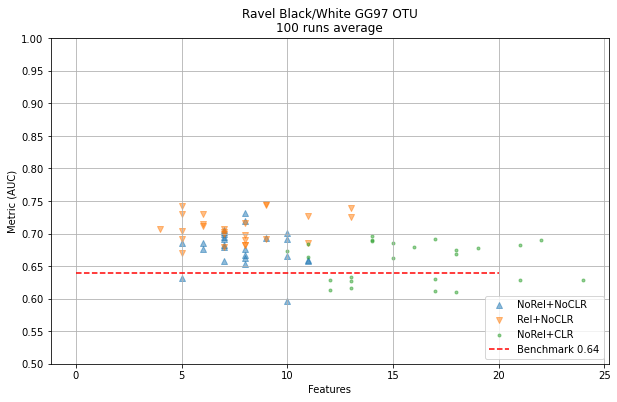

In [16]:
utils.plot(d['NoRel+NoCLR'], d['Rel+NoCLR'], d['NoRel+CLR'], 'num_genes', 'avg_n', num_features, weights, title=task, subtitle='100 runs average', baseline=0.64, filename='./plotsv2/ravel_black_white_gg97_otu_avg_n.png', xmax=30, ylim=(0.5, 1.001))

---

In [57]:
import pandas as pd
import numpy as np

import sys 
sys.path.append('../src')

import utils

import dataset
import config
import run_best_features
from tasks import *

import ast

In [74]:
folder = 'ravel-black-whitev2'
top_n = 5
n = 100

stats = {
    'NoRel+NoCLR': pd.read_csv('./'+folder+'/stats_gg_NoRel+NoCLR.tsv', sep='\t'),
    'Rel+NoCLR': pd.read_csv('./'+folder+'/stats_gg_Rel+NoCLR.tsv', sep='\t'),
    'NoRel+CLR': pd.read_csv('./'+folder+'/stats_gg_NoRel+CLR.tsv', sep='\t'),
}

best_n = {
    'NoRel+NoCLR': [],
    'Rel+NoCLR': [],
    'NoRel+CLR': [],
}

best_n_features = {
    'NoRel+NoCLR': [],
    'Rel+NoCLR': [],
    'NoRel+CLR': [],
}

In [75]:
config.DATA_PARAMS['task'] = vaginal['ravel_white_black_gg_otu']
config.DATA_PARAMS['relative_abundance'] = False
config.DATA_PARAMS['comp_alg'] = ''
data1 = dataset.ClassificationDataset(**config.DATA_PARAMS)

for i in range(1, top_n + 1):
    top_n_features = utils.get_top_n_features(stats['NoRel+NoCLR'], i)
    score, fi = run_best_features.run(config, data1, top_n_features, n)
    best_n['NoRel+NoCLR'].append(np.round(np.mean(score), 3))
    best_n_features['NoRel+NoCLR'].append(len(top_n_features))

config.DATA_PARAMS['task'] = vaginal['ravel_white_black_gg_otu']
config.DATA_PARAMS['relative_abundance'] = True
config.DATA_PARAMS['comp_alg'] = ''
data2 = dataset.ClassificationDataset(**config.DATA_PARAMS)

for i in range(1, top_n + 1):
    top_n_features = utils.get_top_n_features(stats['Rel+NoCLR'], i)
    score, fi = run_best_features.run(config, data2, top_n_features, n)
    best_n['Rel+NoCLR'].append(np.round(np.mean(score), 3))
    best_n_features['Rel+NoCLR'].append(len(top_n_features))

config.DATA_PARAMS['task'] = vaginal['ravel_white_black_gg_otu']
config.DATA_PARAMS['relative_abundance'] = False
config.DATA_PARAMS['comp_alg'] = 'clr'
data3 = dataset.ClassificationDataset(**config.DATA_PARAMS)

for i in range(1, top_n + 1):
    top_n_features = utils.get_top_n_features(stats['NoRel+CLR'], i)
    score, fi = run_best_features.run(config, data3, top_n_features, n)
    best_n['NoRel+CLR'].append(np.round(np.mean(score), 3))
    best_n_features['NoRel+CLR'].append(len(top_n_features))

Final dataset shape: (200, 1095)
Final dataset shape: (200, 1095)
Final dataset shape: (200, 1095)


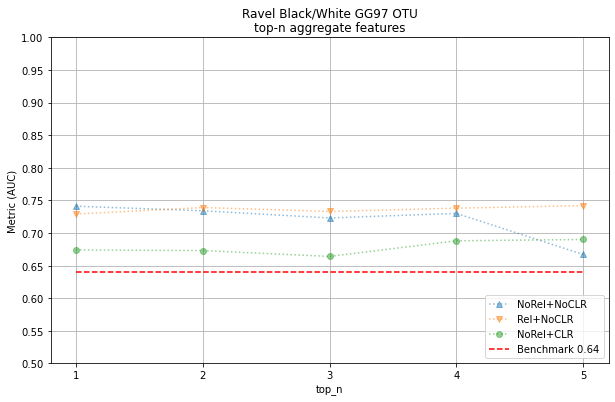

In [76]:
utils.plot_nruns_topn(best_n, title=task, subtitle='top-n aggregate features', baseline=0.64, filename='./plotsv2/ravel_black_white_nruns_topn_refseq_otu.png', xmax=(top_n-1), ylim=(0.5, 1.0001), top_n=top_n)

In [77]:
print(best_n)
print(best_n_features)

{'NoRel+NoCLR': [0.741, 0.734, 0.723, 0.73, 0.667], 'Rel+NoCLR': [0.729, 0.739, 0.733, 0.738, 0.742], 'NoRel+CLR': [0.674, 0.673, 0.664, 0.688, 0.69]}
{'NoRel+NoCLR': [8, 15, 21, 24, 31], 'Rel+NoCLR': [9, 15, 17, 24, 27], 'NoRel+CLR': [14, 29, 39, 58, 68]}


---

In [78]:
import importlib
importlib.reload(run_best_features)
importlib.reload(utils)

<module 'utils' from 'C:\\Users\\mikel\\Documents\\MScAI\\Sem4\\proposal-draft\\microbiome\\microbiome-analysis\\output\\utils.py'>

In [79]:
experiment = 'NoRel+NoCLR'

# get the features of highest best_n combination
top_n_features = utils.get_top_n_features(stats[experiment], np.argmax(best_n[experiment]) + 1)
top_n_features = sorted(top_n_features)
score, fi = run_best_features.run(config, data1, top_n_features, 1, print_features=True)

         ASV      Coeff/Importance  Taxonomy
       1066814      0.0911    []
        930873      0.1123    []
        851726      0.1388    []
        114964      0.1791    ['k__Bacteria; p__Firmicutes; c__Bacilli; o__Lactobacillales; f__Lactobacillaceae; g__Lactobacillus; s__vaginalis']
       1016547      0.1818    ['k__Bacteria; p__Actinobacteria; c__Actinobacteria; o__Actinomycetales; f__Corynebacteriaceae; g__Corynebacterium; s__']
        133178      0.2969    ['k__Bacteria; p__Firmicutes; c__Clostridia; o__Coriobacteriales; f__Coriobacteriaceae; g__; s__']



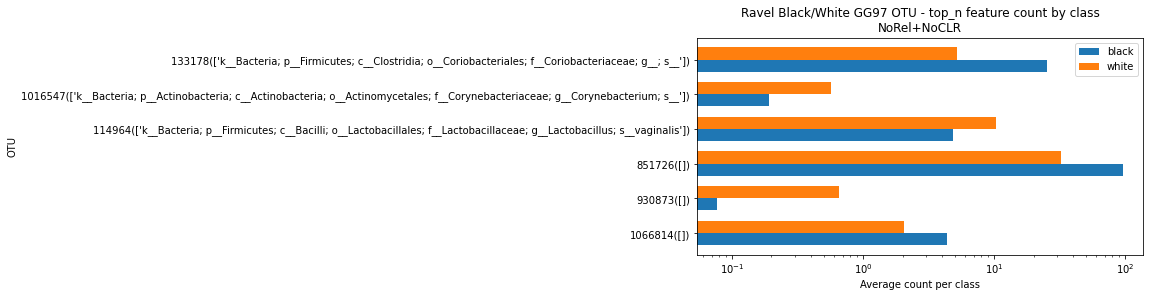

In [80]:
features = data1.features[top_n_features]
filename = f'./plotsv2/ravel_black_white_features_by_class_{experiment}_gg_otu.png'
utils.plot_features_per_class(data1, fi, title=task+' - top_n feature count by class', subtitle=experiment, classes=('black', 'white'), figsize=(8,4), filename=filename, clean_otu=False)

In [81]:
experiment = 'Rel+NoCLR'

# get the features of highest best_n combination
top_n_features = utils.get_top_n_features(stats[experiment], np.argmax(best_n[experiment]) + 1)
top_n_features = sorted(top_n_features)

score, fi = run_best_features.run(config, data2, top_n_features, 1, print_features=True)

         ASV      Coeff/Importance  Taxonomy
       1086889      0.0119    []
       1115121       0.02     ['k__Bacteria; p__Bacteroidetes; c__Bacteroidia; o__Bacteroidales; f__S24-7; g__; s__']
       3221156      0.0378    ['k__Bacteria; p__Fusobacteria; c__Fusobacteria; o__Fusobacteriales; f__Fusobacteriaceae; g__Fusobacterium; s__']
        347922      0.0391    ['k__Bacteria; p__Firmicutes; c__Bacilli; o__Lactobacillales; f__Lactobacillaceae; g__Lactobacillus; s__']
        13354       0.0405    ['k__Bacteria; p__Actinobacteria; c__Actinobacteria; o__Actinomycetales; f__Corynebacteriaceae; g__Corynebacterium; s__']
        663885      0.0438    []
        14286       0.0445    ['k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Clostridiaceae; g__Anaerococcus; s__hydrogenalis']
        930873      0.0446    []
        268507      0.0448    ['k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Clostridiaceae; g__Peptoniphilus; s__asaccharolyticus']
      

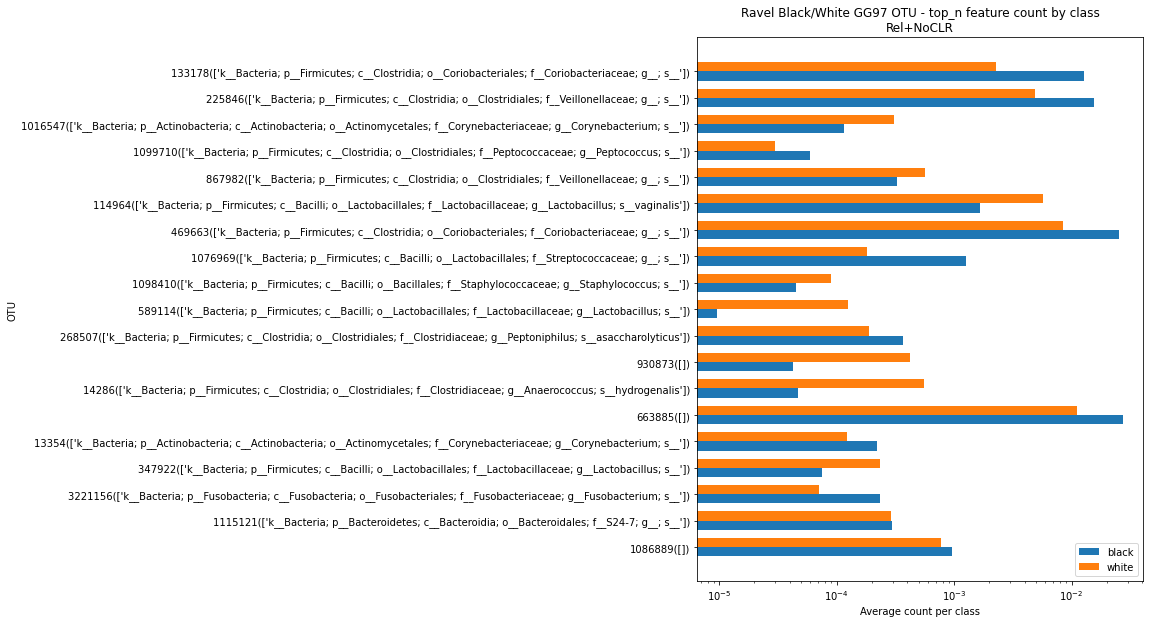

In [82]:
features = data2.features[top_n_features]
filename = f'./plotsv2/ravel_black_white_features_by_class_{experiment}_gg_otu.png'
utils.plot_features_per_class(data2, fi, title=task+' - top_n feature count by class', subtitle=experiment, classes=('black', 'white'), figsize=(8,10), filename=filename, clean_otu=False)

In [83]:
experiment = 'NoRel+CLR'

# get the features of highest best_n combination
top_n_features = utils.get_top_n_features(stats[experiment], np.argmax(best_n[experiment]) + 1)
top_n_features = sorted(top_n_features)

score, fi = run_best_features.run(config, data3, top_n_features, 1, print_features=True)

         ASV      Coeff/Importance  Taxonomy
        137580      0.0194    ['k__Bacteria; p__Firmicutes; c__Bacilli; o__Lactobacillales; f__Lactobacillaceae; g__Lactobacillus; s__']
        227000      0.0248    ['k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Lachnospiraceae; g__Shuttleworthia; s__']
        609964      0.0299    []
        715913      0.036     []
        542066      0.0366    ['k__Bacteria; p__Actinobacteria; c__Actinobacteria; o__Actinomycetales; f__; g__; s__']
       1025861      0.0371    ['k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Clostridiaceae; g__Peptoniphilus; s__asaccharolyticus']
       1016547      0.0416    ['k__Bacteria; p__Actinobacteria; c__Actinobacteria; o__Actinomycetales; f__Corynebacteriaceae; g__Corynebacterium; s__']
        589114      0.0519    ['k__Bacteria; p__Firmicutes; c__Bacilli; o__Lactobacillales; f__Lactobacillaceae; g__Lactobacillus; s__']
        741701      0.0613    []
        867982      0

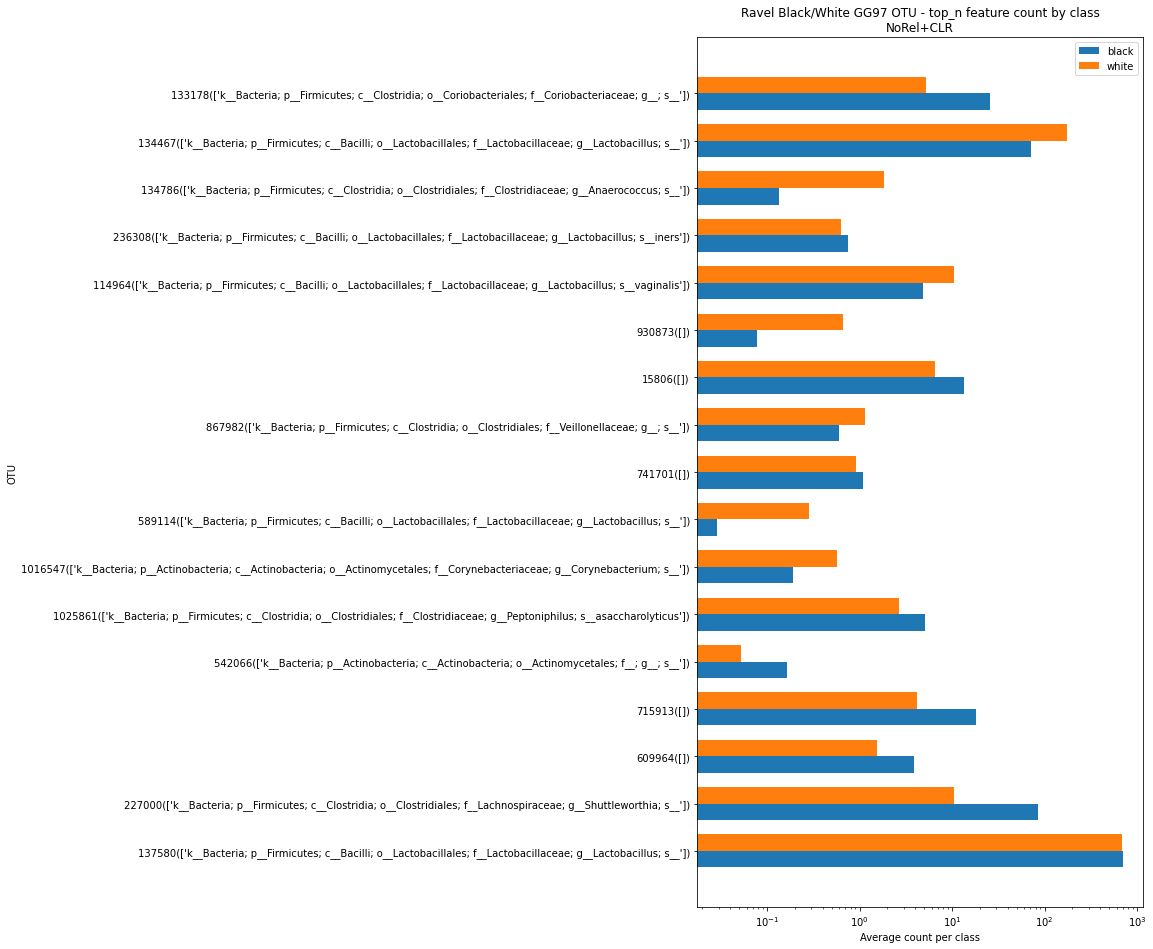

In [84]:
features = data3.features[top_n_features]
filename = f'./plotsv2/ravel_black_white_features_by_class_{experiment}_gg_otu.png'
utils.plot_features_per_class(data3, fi, title=task+' - top_n feature count by class', subtitle=experiment, classes=('black', 'white'), figsize=(8,16), filename=filename, clean_otu=False)